In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel("C:/Users/pmath/OneDrive/Desktop/New folder/Smart-Predictive-Modeling-for-Rental-Property-Prices-main/Smart-Predictive-Modeling-for-Rental-Property-Prices-main/House_Rent_Train.xlsx")

In [18]:
df

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,ff8081815733a243015733b2876600a6,BHK2,Whitefield,2018-04-21 14:44:00,12.934471,77.634471,FAMILY,1,1,1,...,2.0,E,2.0,6.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,2017-09-10 12:48:00,12.929557,77.672280,ANYONE,0,1,0,...,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,2018-12-06 22:02:00,12.982870,80.262012,FAMILY,0,1,0,...,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,2018-07-20 16:22:00,12.955991,77.531634,FAMILY,0,0,0,...,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,2018-05-31 17:41:00,12.963903,77.649446,FAMILY,0,0,0,...,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20495,ff8081815b48bfdd015b4d0e6e720dde,BHK2,"Gattigere,RR Nagar",2017-12-13 18:08:00,12.925380,77.524397,ANYONE,1,1,1,...,3.0,E,3.0,4.0,4.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",BOREWELL,AP,2.0,25000.0
20496,ff8081815e73c2e2015e74ac10e91975,BHK2,Koramangala 4th Block,2017-10-19 20:31:00,12.931072,77.632361,ANYONE,0,0,0,...,2.0,N,2.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IH,2.0,30000.0
20497,ff8081816073f28c016077bb8db47e4f,BHK2,Kumaraswamy Layout,2017-12-21 21:18:00,12.901800,77.566597,FAMILY,1,1,0,...,2.0,W,2.0,5.0,5.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",BOREWELL,AP,2.0,16000.0
20498,ff8081814c6f8c9b014c6febae49016f,BHK2,Indiranagar,2018-06-28 21:58:00,12.965502,77.647694,FAMILY,0,1,0,...,2.0,E,2.0,2.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":true,""AC"":...",CORP_BORE,AP,3.0,30000.0


#  Data Preprocessing and Data Cleaning

In [4]:
df.shape

(20555, 25)

In [6]:
df.isnull().sum()

id                   0
type                27
locality           160
activation_date     23
latitude            23
longitude           23
lease_type          23
gym                  0
lift                 0
swimming_pool        0
negotiable           0
furnishing           0
parking              0
property_size        0
property_age        23
bathroom            23
facing              23
cup_board           23
floor               23
total_floor         23
amenities           23
water_supply        23
building_type       23
balconies           23
rent                23
dtype: int64

#  NULL Imputation

In [7]:
df['type']=df['type'].fillna(df['type'].mode().iloc[0])
df['locality']=df['locality'].fillna(df['locality'].mode().iloc[0])
df['lease_type']=df['lease_type'].fillna(df['lease_type'].mode().iloc[0])
df['bathroom']=df['bathroom'].fillna(df['bathroom'].median())
df['facing']=df['facing'].fillna(df['facing'].mode().iloc[0])
df['cup_board']=df['cup_board'].fillna(df['cup_board'].mode().iloc[0])
df['floor']=df['floor'].fillna(df['floor'].median())
df['amenities']=df['amenities'].fillna(df['amenities'].mode().iloc[0]) 
df['water_supply']=df['water_supply'].fillna(df['water_supply'].mode().iloc[0]) 
df['building_type']=df['building_type'].fillna(df['building_type'].mode().iloc[0])
df['balconies']=df['balconies'].fillna(df['balconies'].median())
df['rent']=df['rent'].fillna(df['rent'].median())
df['total_floor']=df['total_floor'].fillna(df['total_floor'].median()) 
df['property_age']=df['property_age'].fillna(df['property_age'].median())

In [8]:
df.isnull().sum()

id                  0
type                0
locality            0
activation_date    23
latitude           23
longitude          23
lease_type          0
gym                 0
lift                0
swimming_pool       0
negotiable          0
furnishing          0
parking             0
property_size       0
property_age        0
bathroom            0
facing              0
cup_board           0
floor               0
total_floor         0
amenities           0
water_supply        0
building_type       0
balconies           0
rent                0
dtype: int64

In [9]:
df=df.dropna()

#  Remove Duplicates

In [10]:
df_duplicates=df.duplicated().sum()

In [11]:
df=df.drop_duplicates()
df.duplicated().sum()

0

#  Correcting Data Types

In [15]:
df.dtypes

id                         object
type                       object
locality                   object
activation_date    datetime64[ns]
latitude                  float64
longitude                 float64
lease_type                 object
gym                         int64
lift                        int64
swimming_pool               int64
negotiable                  int64
furnishing                 object
parking                    object
property_size               int64
property_age              float64
bathroom                  float64
facing                     object
cup_board                 float64
floor                     float64
total_floor               float64
amenities                  object
water_supply               object
building_type              object
balconies                 float64
rent                      float64
dtype: object

In [16]:
def convert_date(value):
    try:
        return pd.to_datetime(value, format='%d-%m-%Y %H:%M')
    except ValueError:
        return pd.to_datetime(value, format='%Y-%m-%d %H:%M:%S')
    
df['activation_date']=df['activation_date'].apply(convert_date)

In [17]:
df.dtypes

id                         object
type                       object
locality                   object
activation_date    datetime64[ns]
latitude                  float64
longitude                 float64
lease_type                 object
gym                         int64
lift                        int64
swimming_pool               int64
negotiable                  int64
furnishing                 object
parking                    object
property_size               int64
property_age              float64
bathroom                  float64
facing                     object
cup_board                 float64
floor                     float64
total_floor               float64
amenities                  object
water_supply               object
building_type              object
balconies                 float64
rent                      float64
dtype: object

#  Amenities Extraction

In [19]:
def amenities_extract(df,column):
    amenity_dicts={}
    
    for index,value in df[column].items():
        if pd.notnull(value):
            amenity_dicts[index] = json.loads(value)
        else:
            amenity_dicts[index] = {}
            
            
    for index,amenities in amenity_dicts.items():
        for key,value in amenities.items():
            column_name=key
            df.at[index,column_name] = value
            
    return df

df = amenities_extract(df, 'amenities')

In [26]:
df

,type,locality,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,...,SERVANT,SECURITY,SC,GP,PARK,RWH,STP,HK,PB,VP
0,BHK2,Whitefield,FAMILY,1,1,1,0,SEMI_FURNISHED,BOTH,1250,...,False,True,True,True,False,True,True,False,True,True
1,BHK2,Bellandur,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,1400,...,False,True,True,False,True,True,True,False,True,True
2,BHK3,Thiruvanmiyur,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1350,...,False,False,True,False,True,False,False,False,True,True
3,BHK1,Attiguppe,FAMILY,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,...,False,False,False,False,False,False,False,False,False,False
4,BHK3,Kodihalli,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,1500,...,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20495,BHK2,"Gattigere,RR Nagar",ANYONE,1,1,1,1,SEMI_FURNISHED,BOTH,1650,...,False,True,True,False,False,False,False,False,True,True
20496,BHK2,Koramangala 4th Block,ANYONE,0,0,0,1,SEMI_FURNISHED,BOTH,1000,...,False,False,True,False,True,True,False,False,False,False
20497,BHK2,Kumaraswamy Layout,FAMILY,1,1,0,1,SEMI_FURNISHED,BOTH,1000,...,False,True,False,False,True,False,False,False,True,False
20498,BHK2,Indiranagar,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1000,...,False,True,True,False,True,False,False,True,True,True


In [27]:
df.columns

Index(['type', 'locality', 'lease_type', 'gym', 'lift', 'swimming_pool',
       'negotiable', 'furnishing', 'parking', 'property_size', 'property_age',
       'bathroom', 'facing', 'cup_board', 'floor', 'total_floor',
       'water_supply', 'building_type', 'balconies', 'rent', 'INTERNET', 'AC',
       'CLUB', 'INTERCOM', 'CPA', 'FS', 'SERVANT', 'SECURITY', 'SC', 'GP',
       'PARK', 'RWH', 'STP', 'HK', 'PB', 'VP'],
      dtype='object')

#  Dropping Columns

In [28]:
df=df.drop(['LIFT','GYM','POOL','latitude','longitude','activation_date','id','amenities'],axis=1)

KeyError: "['LIFT', 'GYM', 'POOL', 'latitude', 'longitude', 'activation_date', 'id', 'amenities'] not found in axis"

# Checking NULL values for updating Data Frame

In [ ]:
df.isnull().sum()

In [18]:
df['CLUB']=df['CLUB'].fillna(df['CLUB'].mode().iloc(0))
df['CPA']=df['CPA'].fillna(df['CPA'].mode().iloc(0))
df['SERVANT']=df['SERVANT'].fillna(df['SERVANT'].mode().iloc(0))
df['GP']=df['GP'].fillna(df['GP'].mode().iloc(0))
df['RWH']=df['RWH'].fillna(df['RWH'].mode().iloc(0))
df['STP']=df['STP'].fillna(df['STP'].mode().iloc(0))
df['VP']=df['VP'].fillna(df['VP'].mode().iloc(0))

In [19]:
df.isnull().sum()

type             0
locality         0
lease_type       0
gym              0
lift             0
swimming_pool    0
negotiable       0
furnishing       0
parking          0
property_size    0
property_age     0
bathroom         0
facing           0
cup_board        0
floor            0
total_floor      0
water_supply     0
building_type    0
balconies        0
rent             0
INTERNET         0
AC               0
CLUB             0
INTERCOM         0
CPA              0
FS               0
SERVANT          0
SECURITY         0
SC               0
GP               0
PARK             0
RWH              0
STP              0
HK               0
PB               0
VP               0
dtype: int64

In [20]:
df.head(10)

,type,locality,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,...,SERVANT,SECURITY,SC,GP,PARK,RWH,STP,HK,PB,VP
0,BHK2,Whitefield,FAMILY,1,1,1,0,SEMI_FURNISHED,BOTH,1250,...,False,True,True,True,False,True,True,False,True,True
1,BHK2,Bellandur,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,1400,...,False,True,True,False,True,True,True,False,True,True
2,BHK3,Thiruvanmiyur,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1350,...,False,False,True,False,True,False,False,False,True,True
3,BHK1,Attiguppe,FAMILY,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,...,False,False,False,False,False,False,False,False,False,False
4,BHK3,Kodihalli,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,1500,...,False,False,False,False,True,False,False,False,False,True
5,BHK1,"Seetharampalya,Hoodi",FAMILY,1,1,1,1,SEMI_FURNISHED,BOTH,1080,...,False,True,False,False,False,False,False,False,True,False
6,BHK3,"Narayanappa Garden,Whitefield",ANYONE,1,1,1,1,FULLY_FURNISHED,BOTH,1895,...,True,True,True,False,True,True,True,True,True,True
7,BHK2,HSR Layout 5th Sector,ANYONE,0,0,0,1,SEMI_FURNISHED,BOTH,1000,...,False,False,True,False,False,False,False,False,True,True
8,BHK2,Banashankari,ANYONE,0,0,0,0,SEMI_FURNISHED,NONE,900,...,False,True,True,False,True,False,False,False,False,False
9,BHK2,Whitefield,ANYONE,1,1,0,1,SEMI_FURNISHED,BOTH,1290,...,True,True,False,False,True,True,True,True,True,False


In [21]:
df.tail(10)

,type,locality,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,...,SERVANT,SECURITY,SC,GP,PARK,RWH,STP,HK,PB,VP
20490,BHK2,Bommanahalli,FAMILY,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,700,...,False,False,True,False,True,False,False,False,False,False
20491,BHK1,Kaggadasapura,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,600,...,False,True,True,True,True,False,False,False,False,False
20492,BHK1,Ulsoor,ANYONE,0,1,0,1,SEMI_FURNISHED,TWO_WHEELER,850,...,False,True,True,True,True,False,False,True,False,True
20493,BHK2,"Someshwara Layout,Doddakannelli",ANYONE,1,1,0,0,SEMI_FURNISHED,BOTH,1400,...,False,True,False,False,False,False,False,False,False,False
20494,BHK2,"Seetharampalya,Hoodi",FAMILY,1,1,1,1,SEMI_FURNISHED,BOTH,1400,...,False,True,True,True,False,False,False,True,True,True
20495,BHK2,"Gattigere,RR Nagar",ANYONE,1,1,1,1,SEMI_FURNISHED,BOTH,1650,...,False,True,True,False,False,False,False,False,True,True
20496,BHK2,Koramangala 4th Block,ANYONE,0,0,0,1,SEMI_FURNISHED,BOTH,1000,...,False,False,True,False,True,True,False,False,False,False
20497,BHK2,Kumaraswamy Layout,FAMILY,1,1,0,1,SEMI_FURNISHED,BOTH,1000,...,False,True,False,False,True,False,False,False,True,False
20498,BHK2,Indiranagar,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1000,...,False,True,True,False,True,False,False,True,True,True
20499,BHK1,Malleshwaram West,ANYONE,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,500,...,False,False,True,False,True,False,False,False,False,False


In [22]:
df.sample(5)

,type,locality,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,...,SERVANT,SECURITY,SC,GP,PARK,RWH,STP,HK,PB,VP
5999,BHK1,Jayanagar,FAMILY,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,400,...,False,False,True,False,True,False,False,False,False,False
13821,BHK2,Brookefield,FAMILY,1,1,0,0,SEMI_FURNISHED,BOTH,1065,...,False,True,True,True,True,True,False,False,True,True
11784,BHK2,Byraveshwara Nagar,ANYONE,0,0,0,0,SEMI_FURNISHED,TWO_WHEELER,1500,...,False,False,False,True,False,False,False,False,False,False
4041,BHK2,Munnekollal,ANYONE,1,1,0,0,SEMI_FURNISHED,BOTH,983,...,False,True,True,False,False,False,False,True,True,False
19660,BHK2,HSR Layout,FAMILY,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,750,...,False,False,True,False,False,False,False,False,False,True


In [23]:
df['type'].replace('1BHK1','BHK1',inplace=True)
df['type'].replace('bhk2','BHK2',inplace=True)
df['type'].replace('bhk3','BHK3',inplace=True)

#  Exploratory Data Analysis (EDA)

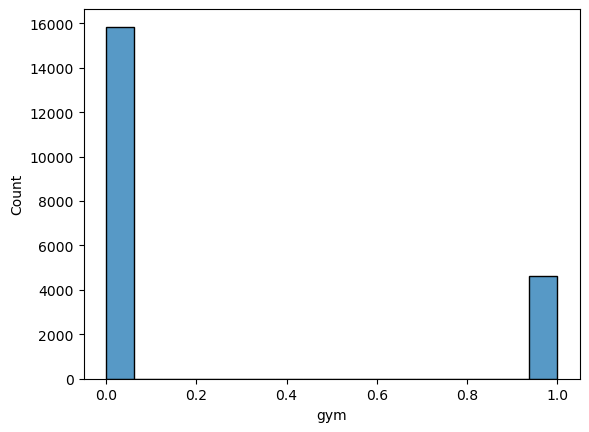

In [24]:
sns.histplot(df['gym'])
plt.show()

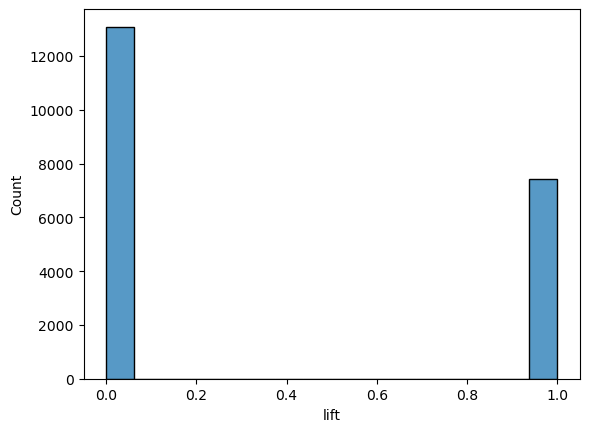

In [25]:
sns.histplot(df['lift'])
plt.show()

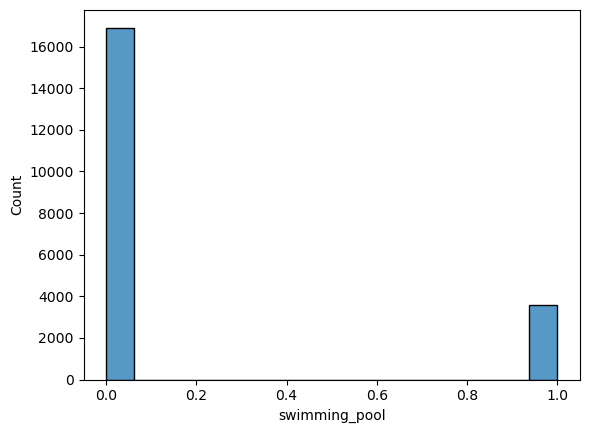

In [26]:
sns.histplot(df['swimming_pool'])
plt.show()

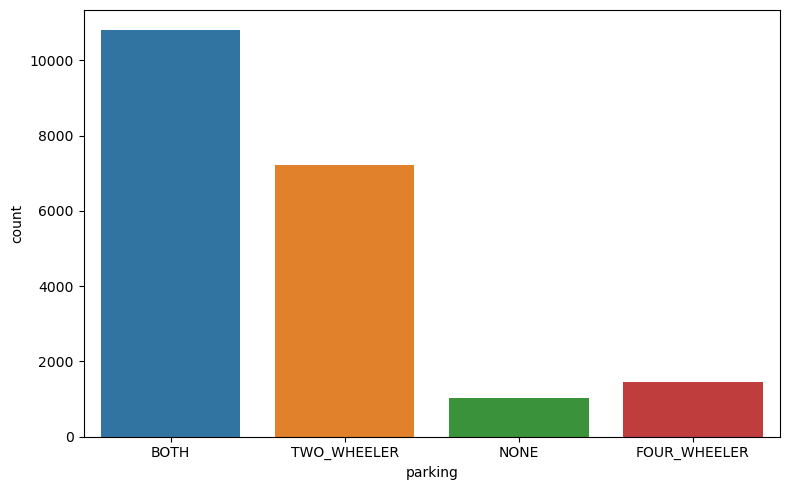

In [27]:
plt.figure(figsize=(8,5))
sns.countplot(df,x='parking')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

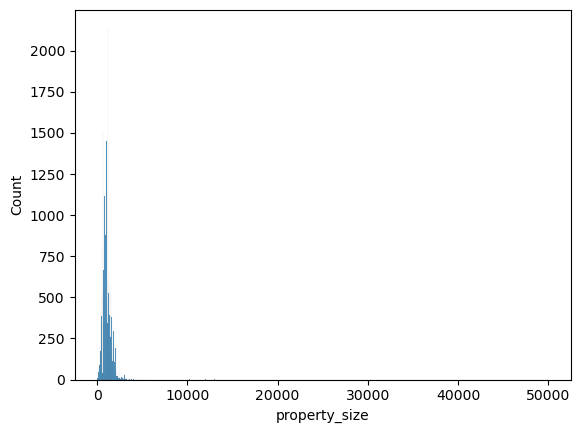

In [28]:
sns.histplot(df['property_size'])
plt.show()

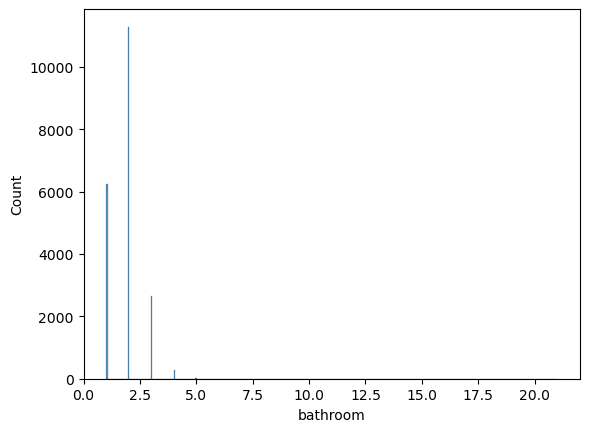

In [29]:
sns.histplot(df['bathroom'])
plt.show()

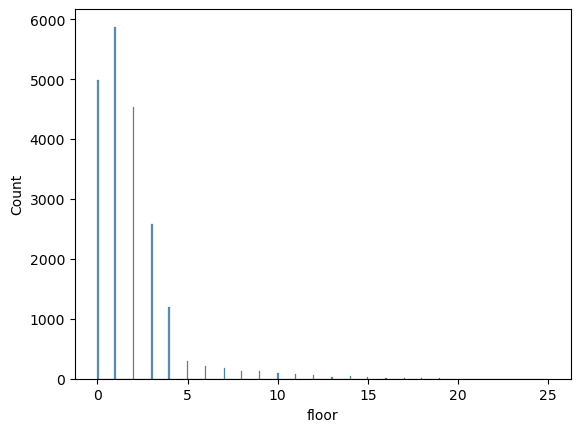

In [30]:
sns.histplot(df['floor'])
plt.show()

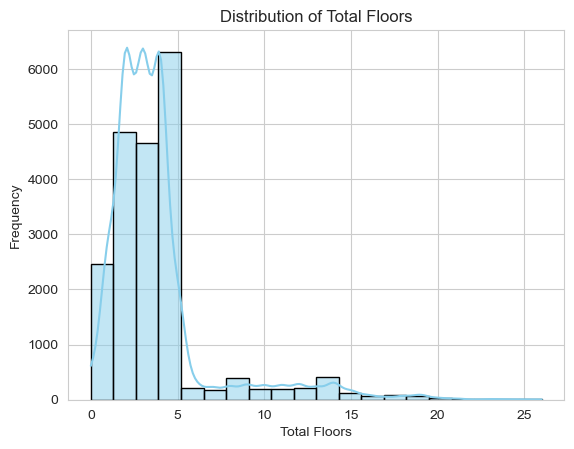

In [31]:
sns.set_style("whitegrid")

# Create a histogram using seaborn with additional details
sns.histplot(df['total_floor'], bins=20, kde=True, color='skyblue', edgecolor='black', label='Total Floors')

# Add labels and title
plt.xlabel('Total Floors')
plt.ylabel('Frequency')
plt.title('Distribution of Total Floors')

# Add grid lines (optional)
plt.grid(True)

# Show plot
plt.show()

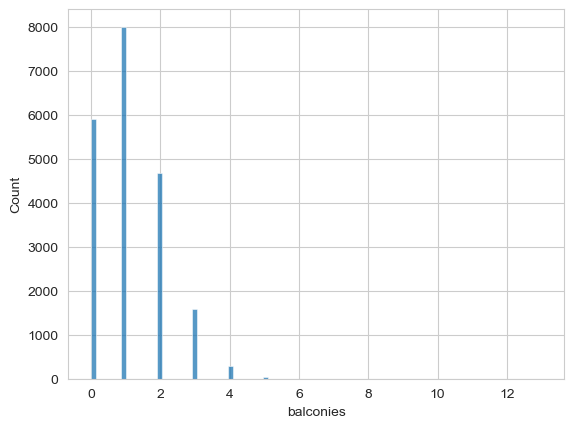

In [32]:
sns.histplot(df['balconies'])
plt.show()

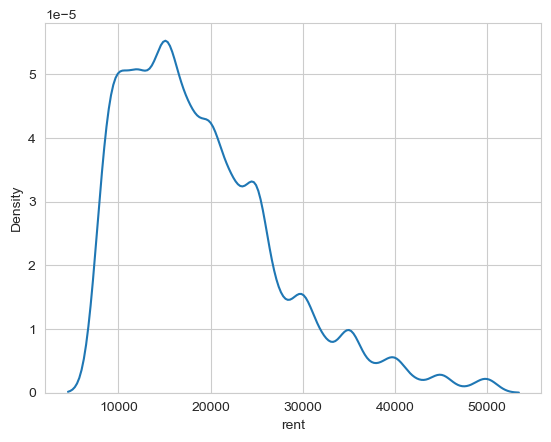

In [33]:
sns.kdeplot(x=df['rent'])
plt.show()


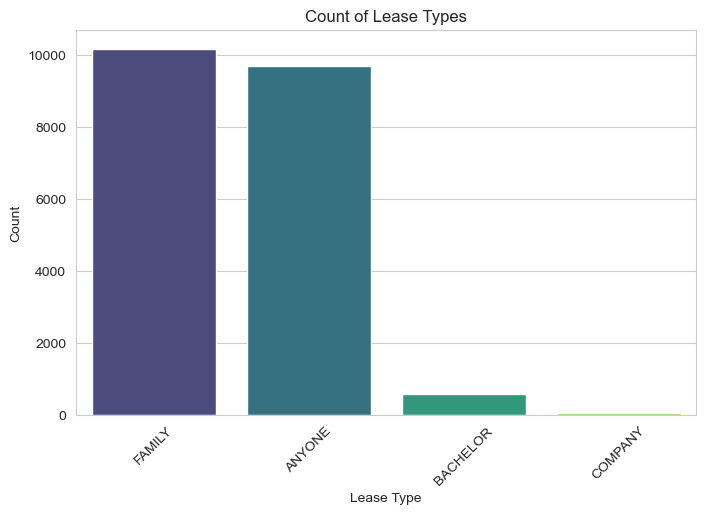

In [34]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='lease_type', palette='viridis')
plt.title('Count of Lease Types')
plt.xlabel('Lease Type')
plt.ylabel('Count')
plt.xticks(rotation=45);

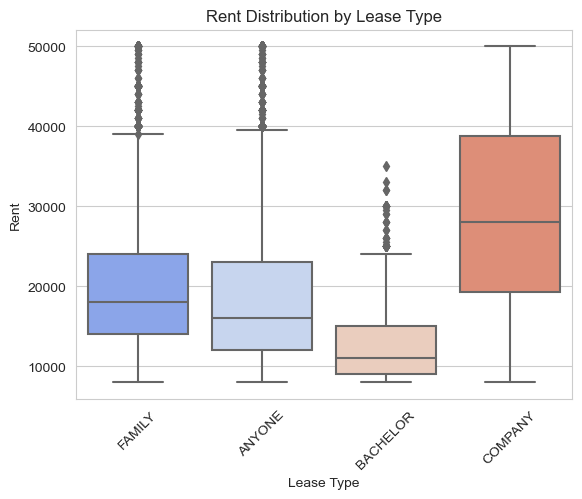

In [35]:
sns.boxplot(data=df, x='lease_type', y='rent', palette='coolwarm')
plt.title('Rent Distribution by Lease Type')
plt.xlabel('Lease Type')
plt.ylabel('Rent')
plt.xticks(rotation=45);

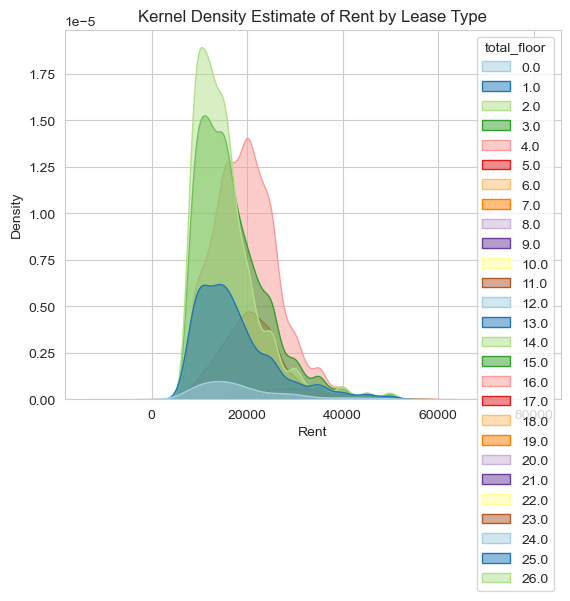

In [36]:
sns.kdeplot(data=df, x='rent', hue='total_floor', fill=True, palette='Paired', alpha=0.5)
plt.title('Kernel Density Estimate of Rent by Lease Type')
plt.xlabel('Rent')
plt.ylabel('Density');

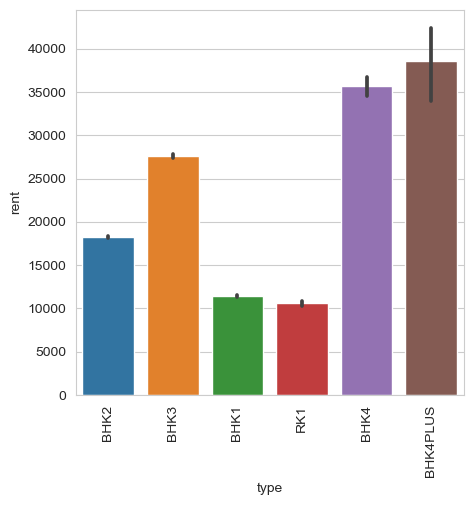

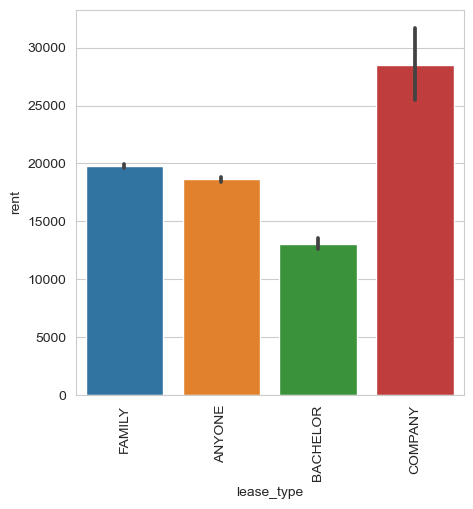

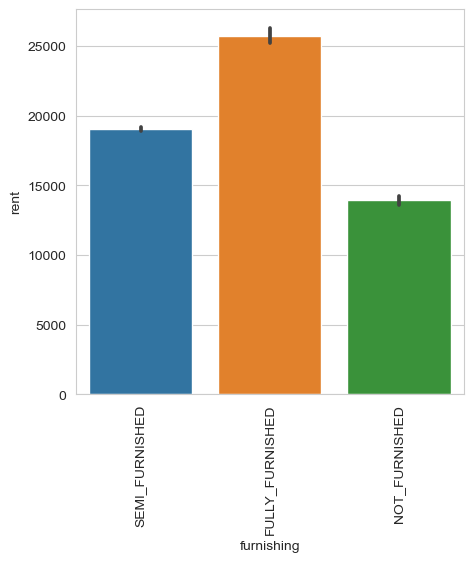

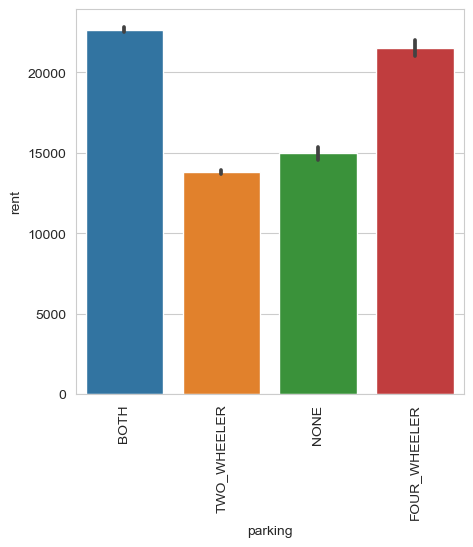

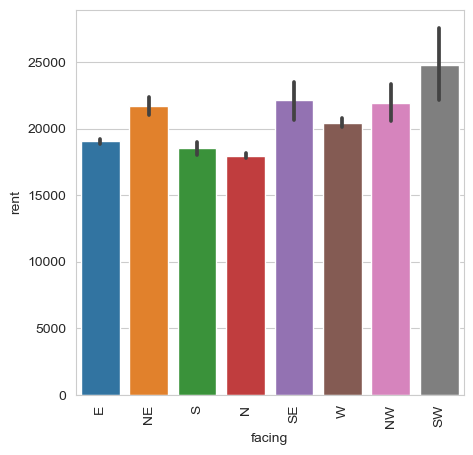

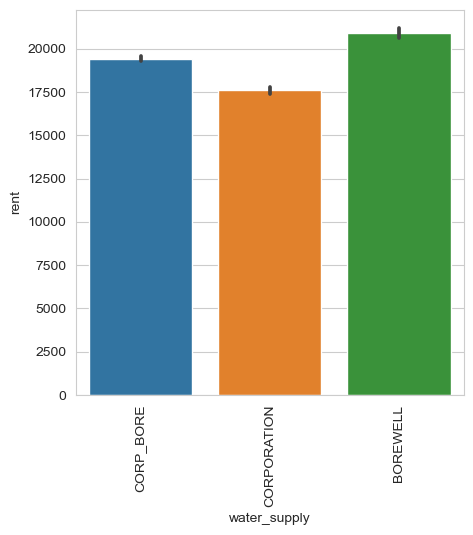

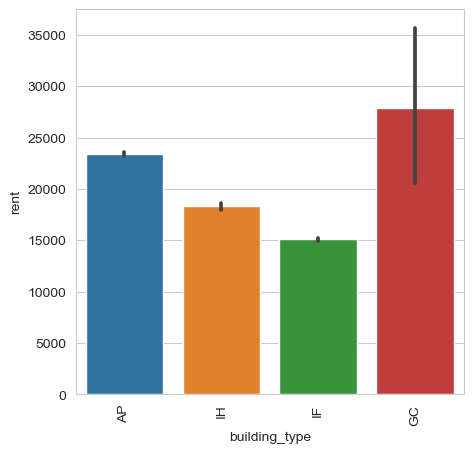

In [37]:
plt.figure(figsize=(5,5))
sns.barplot(data=df,x='type',y='rent')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(5,5))
sns.barplot(data=df,x='lease_type',y='rent')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(5,5))
sns.barplot(data=df,x='furnishing',y='rent')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(5,5))
sns.barplot(data=df,x='parking',y='rent')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(5,5))
sns.barplot(data=df,x='facing',y='rent')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(5,5))
sns.barplot(data=df,x='water_supply',y='rent')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(5,5))
sns.barplot(data=df,x='building_type',y='rent')
plt.xticks(rotation=90)
plt.show()

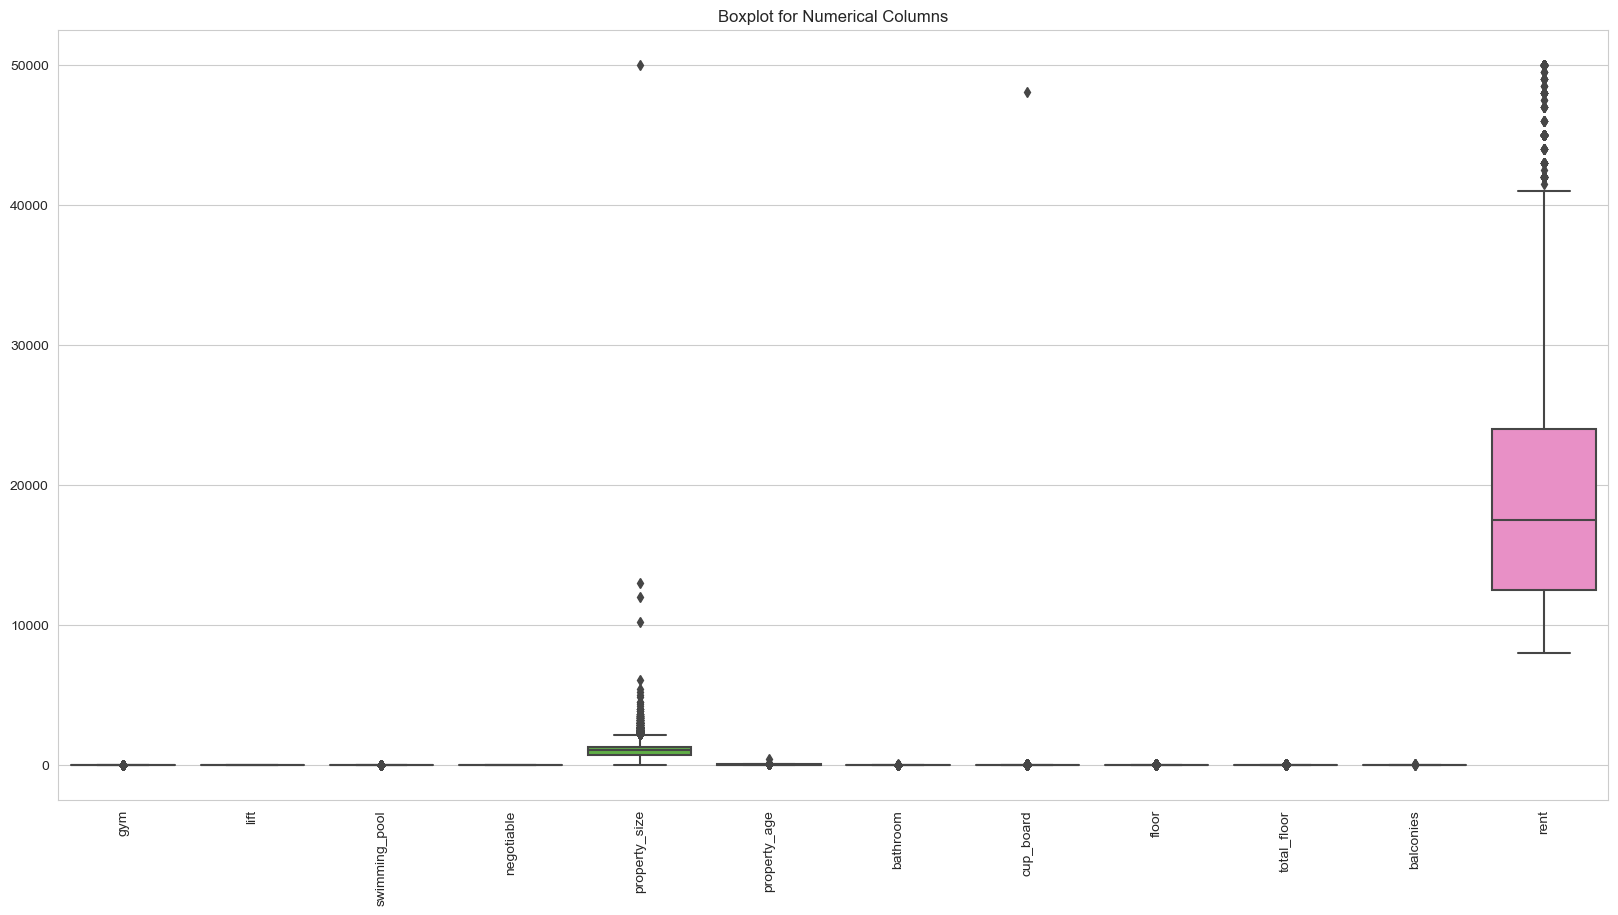

In [38]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Plotting boxplots for all numerical columns
df_numerical = df[numerical_columns]

plt.figure(figsize=(20,10))
sns.boxplot(data=df_numerical)
plt.xticks(rotation=90)
plt.title('Boxplot for Numerical Columns')
plt.show()

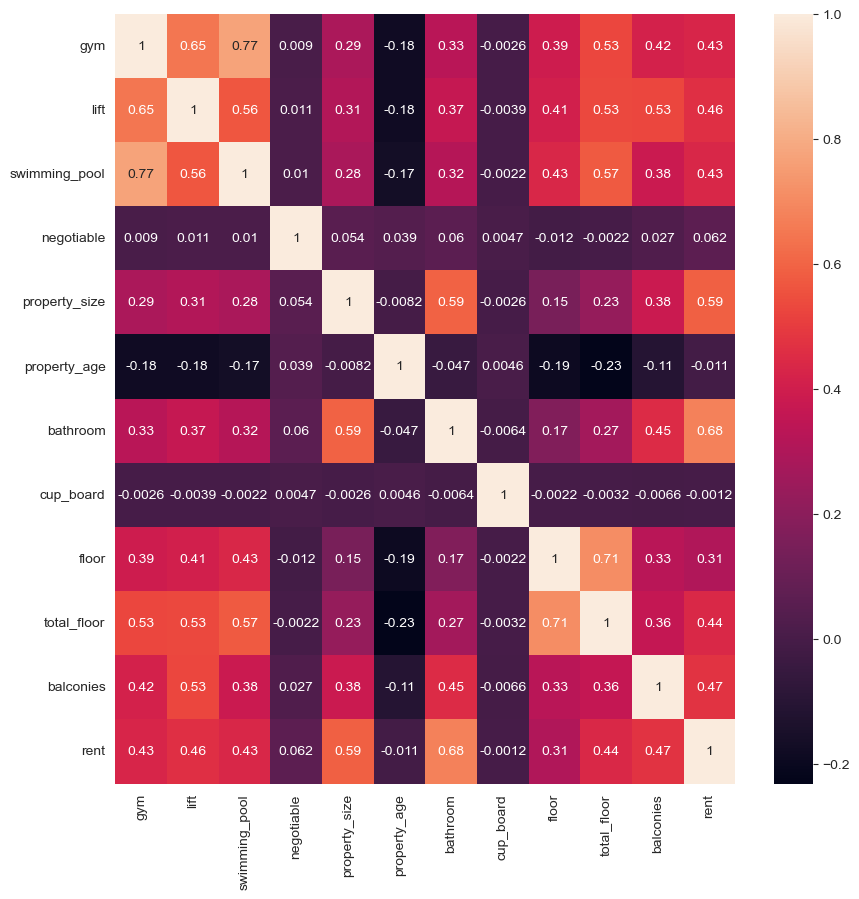

In [39]:
plt.figure(figsize=(10, 10))
sns.heatmap(df[numerical_columns].corr(),annot = True)
plt.show()

#  Checking Outliers

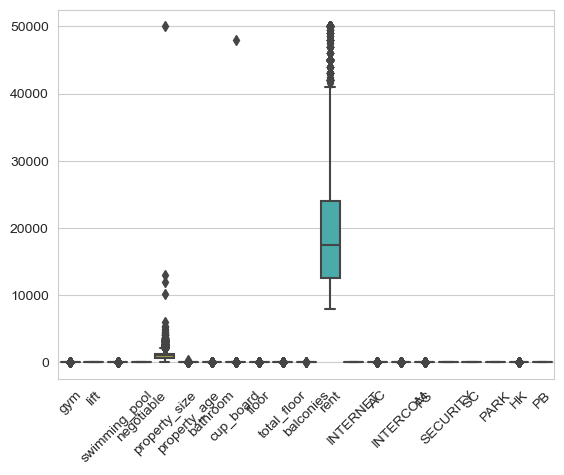

In [40]:
# Create boxplot for numerical columns
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()


# Encoding

In [41]:
df

,type,locality,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,...,SERVANT,SECURITY,SC,GP,PARK,RWH,STP,HK,PB,VP
0,BHK2,Whitefield,FAMILY,1,1,1,0,SEMI_FURNISHED,BOTH,1250,...,False,True,True,True,False,True,True,False,True,True
1,BHK2,Bellandur,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,1400,...,False,True,True,False,True,True,True,False,True,True
2,BHK3,Thiruvanmiyur,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1350,...,False,False,True,False,True,False,False,False,True,True
3,BHK1,Attiguppe,FAMILY,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,...,False,False,False,False,False,False,False,False,False,False
4,BHK3,Kodihalli,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,1500,...,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20495,BHK2,"Gattigere,RR Nagar",ANYONE,1,1,1,1,SEMI_FURNISHED,BOTH,1650,...,False,True,True,False,False,False,False,False,True,True
20496,BHK2,Koramangala 4th Block,ANYONE,0,0,0,1,SEMI_FURNISHED,BOTH,1000,...,False,False,True,False,True,True,False,False,False,False
20497,BHK2,Kumaraswamy Layout,FAMILY,1,1,0,1,SEMI_FURNISHED,BOTH,1000,...,False,True,False,False,True,False,False,False,True,False
20498,BHK2,Indiranagar,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1000,...,False,True,True,False,True,False,False,True,True,True


In [42]:
df.columns

Index(['type', 'locality', 'lease_type', 'gym', 'lift', 'swimming_pool',
       'negotiable', 'furnishing', 'parking', 'property_size', 'property_age',
       'bathroom', 'facing', 'cup_board', 'floor', 'total_floor',
       'water_supply', 'building_type', 'balconies', 'rent', 'INTERNET', 'AC',
       'CLUB', 'INTERCOM', 'CPA', 'FS', 'SERVANT', 'SECURITY', 'SC', 'GP',
       'PARK', 'RWH', 'STP', 'HK', 'PB', 'VP'],
      dtype='object')

In [43]:
df['lease_type'].unique()

array(['FAMILY', 'ANYONE', 'BACHELOR', 'COMPANY'], dtype=object)

In [44]:
df['lease_type'] = df['lease_type'].map({'FAMILY':0, 'ANYONE':1, 'BACHELOR':2, 'COMPANY':3})

In [45]:
df['type'] = df['type'].map({'BHK2':0, 'BHK3':1, 'BHK1':2, 'RK1':3, 'BHK4':4, 'BHK4PLUS':5})

In [46]:
df['furnishing'] = df['furnishing'].map({'SEMI_FURNISHED':0, 'FULLY_FURNISHED':1, 'NOT_FURNISHED':2})

In [47]:
df['parking'] = df['parking'].map({'BOTH':0, 'TWO_WHEELER':1, 'NONE':2, 'FOUR_WHEELER':3})

In [48]:
df['facing'] = df['facing'].map({'E':0, 'NE':1, 'S':2, 'N':3, 'SE':4, 'W':5, 'SW':6, 'NW':7 })

In [49]:
df['water_supply'] = df['water_supply'].map({'CORP_BORE':0, 'CORPORATION':1, 'BOREWELL':2})

In [50]:
df['building_type'] = df['building_type'].map({'AP':0, 'IH':1, 'IF':2, 'GC': 3})

In [51]:
df['INTERNET'] = df['INTERNET'].map({True:1, False:0})

In [52]:
df['AC'] = df['AC'].map({False:0, True:1})

In [53]:
df['INTERCOM'] = df['INTERCOM'].map({True:1, False:0})

In [54]:
df['FS'] = df['FS'].map({True:1, False:0})

In [55]:
df['SECURITY'] = df['SECURITY'].map({True:1, False:0})

In [56]:
df['SC'] = df['SC'].map({True:1, False:0})

In [57]:
df['PARK'] = df['PARK'].map({False:0, True:1})

In [58]:
df['HK'] = df['HK'].map({False:0, True:1})

In [59]:
df['PB'] = df['PB'].map({True:1, False:0})

In [60]:
df['STP'] = df['STP'].map({True:1, False:0})

In [61]:
df['CLUB'] = df['CLUB'].map({True:1, False:0})

In [62]:
df['CPA'] = df['CPA'].map({True:1, False:0})

In [63]:
df['SERVANT'] = df['SERVANT'].map({True:1, False:0})

In [64]:
df['GP'] = df['GP'].map({True:1, False:0})

In [65]:
df['RWH'] = df['RWH'].map({True:1, False:0})

In [66]:
df['VP'] = df['VP'].map({True:1, False:0})

In [67]:
df['locality'] = df['locality'].map(df['locality'].value_counts(normalize=True))

In [68]:
df

,type,locality,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,...,SERVANT,SECURITY,SC,GP,PARK,RWH,STP,HK,PB,VP
0,0,0.050634,0,1,1,1,0,0,0,1250,...,0.0,1,1,1.0,0,1.0,1.0,0,1,1.0
1,0,0.021024,1,0,1,0,1,0,0,1400,...,0.0,1,1,0.0,1,1.0,1.0,0,1,1.0
2,1,0.000049,0,0,1,0,0,0,0,1350,...,0.0,0,1,0.0,1,0.0,0.0,0,1,1.0
3,2,0.002390,0,0,0,0,1,0,1,600,...,0.0,0,0,0.0,0,0.0,0.0,0,0,0.0
4,1,0.004537,0,0,0,0,1,0,0,1500,...,0.0,0,0,0.0,1,0.0,0.0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20495,0,0.000341,1,1,1,1,1,0,0,1650,...,0.0,1,1,0.0,0,0.0,0.0,0,1,1.0
20496,0,0.001659,1,0,0,0,1,0,0,1000,...,0.0,0,1,0.0,1,1.0,0.0,0,0,0.0
20497,0,0.010244,0,1,1,0,1,0,0,1000,...,0.0,1,0,0.0,1,0.0,0.0,0,1,0.0
20498,0,0.011317,0,0,1,0,0,0,0,1000,...,0.0,1,1,0.0,1,0.0,0.0,1,1,1.0


In [69]:
df=df.dropna()

In [70]:
df.to_csv("C:/Users/muthu/Desktop/guvi project/career fair capstones/house rent/final_df.csv")

In [71]:
df=pd.read_csv("C:/Users/muthu/Desktop/guvi project/career fair capstones/house rent/final_df.csv")

In [72]:
df

,Unnamed: 0,type,locality,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,...,SERVANT,SECURITY,SC,GP,PARK,RWH,STP,HK,PB,VP
0,0,0,0.050634,0,1,1,1,0,0,0,...,0.0,1,1,1.0,0,1.0,1.0,0,1,1.0
1,1,0,0.021024,1,0,1,0,1,0,0,...,0.0,1,1,0.0,1,1.0,1.0,0,1,1.0
2,2,1,0.000049,0,0,1,0,0,0,0,...,0.0,0,1,0.0,1,0.0,0.0,0,1,1.0
3,3,2,0.002390,0,0,0,0,1,0,1,...,0.0,0,0,0.0,0,0.0,0.0,0,0,0.0
4,4,1,0.004537,0,0,0,0,1,0,0,...,0.0,0,0,0.0,1,0.0,0.0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19428,20495,0,0.000341,1,1,1,1,1,0,0,...,0.0,1,1,0.0,0,0.0,0.0,0,1,1.0
19429,20496,0,0.001659,1,0,0,0,1,0,0,...,0.0,0,1,0.0,1,1.0,0.0,0,0,0.0
19430,20497,0,0.010244,0,1,1,0,1,0,0,...,0.0,1,0,0.0,1,0.0,0.0,0,1,0.0
19431,20498,0,0.011317,0,0,1,0,0,0,0,...,0.0,1,1,0.0,1,0.0,0.0,1,1,1.0
